In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Dados da execução sequencial
sequential_data = [
    {"nNodes": 90000, "nEdges": 18000000, "seed": 2, "Tempo_de_execucao": 7.017111, "mean_per_node": 1073741827.09},
    {"nNodes": 180000, "nEdges": 72000000, "seed": 3, "Tempo_de_execucao": 29.873572, "mean_per_node": 4.82},
    {"nNodes": 270000, "nEdges": 162000000, "seed": 4, "Tempo_de_execucao": 48.124940, "mean_per_node": 1073741826.44},
    {"nNodes": 360000, "nEdges": 288000000, "seed": 5, "Tempo_de_execucao": 151.385813, "mean_per_node": 4.67},
    {"nNodes": 450000, "nEdges": 450000000, "seed": 1, "Tempo_de_execucao": 237.283394, "mean_per_node": 4.67},
]

# Criando DataFrame para os dados sequenciais
df_sequential = pd.DataFrame(sequential_data)

In [8]:
# Função para processar os dados paralelos a partir do arquivo
def process_parallel_data(file_path):
    parallel_data = []
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    current_threads = None
    for line in lines:
        line = line.strip()
        if "NUM_THREADS=" in line:
            current_threads = int(line.split("=")[1])
        elif line.startswith("{"):
            parts = line.replace("{", "").replace("}", "").split("::")
            data = {
                "nNodes": int(parts[0].split(":")[1].strip()),
                "nEdges": int(parts[1].split(":")[1].strip()),
                "seed": int(parts[2].split(":")[1].strip()),
                "Tempo_de_execucao": float(parts[3].split(":")[1].strip()),
                "mean_per_node": float(parts[4].split(":")[1].strip()),
                "num_threads": current_threads,
            }
            parallel_data.append(data)
    return pd.DataFrame(parallel_data)


In [13]:
# Processando os dados paralelos
file_path = "../resultados.txt"  # Atualize para o caminho correto do arquivo
df_parallel = process_parallel_data(file_path)


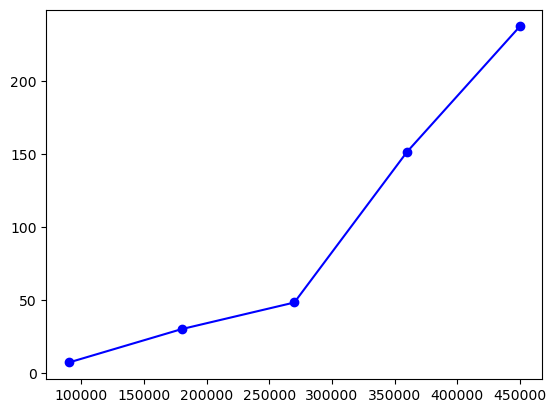

In [17]:
# Plotando o tempo de execução para sequencial
plt.plot(df_sequential["nNodes"], df_sequential["Tempo_de_execucao"], label="Sequencial", marker='o', color="blue")

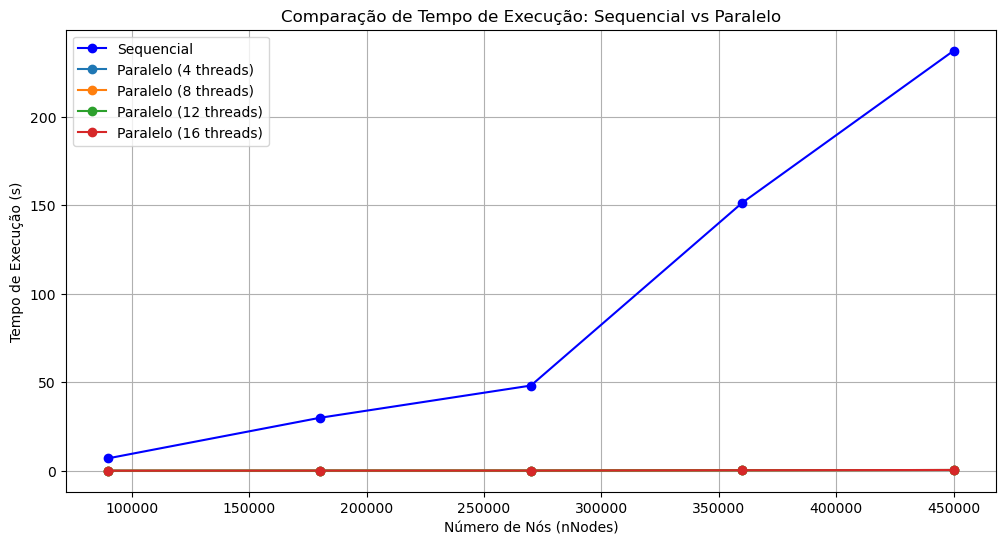

In [20]:
# Comparando as execuções
plt.figure(figsize=(12, 6))

# Plotando o tempo de execução para sequencial
plt.plot(df_sequential["nNodes"], df_sequential["Tempo_de_execucao"], label="Sequencial", marker='o', color="blue")

# Plotando os tempos de execução paralelos
for num_threads in df_parallel["num_threads"].unique():
    df_filtered = df_parallel[df_parallel["num_threads"] == num_threads]
    plt.plot(
        df_filtered["nNodes"],
        df_filtered["Tempo_de_execucao"],
        label=f"Paralelo ({num_threads} threads)",
        marker='o'
    )

plt.xlabel("Número de Nós (nNodes)")
plt.ylabel("Tempo de Execução (s)")
plt.title("Comparação de Tempo de Execução: Sequencial vs Paralelo")
plt.legend()
plt.grid()
plt.show()

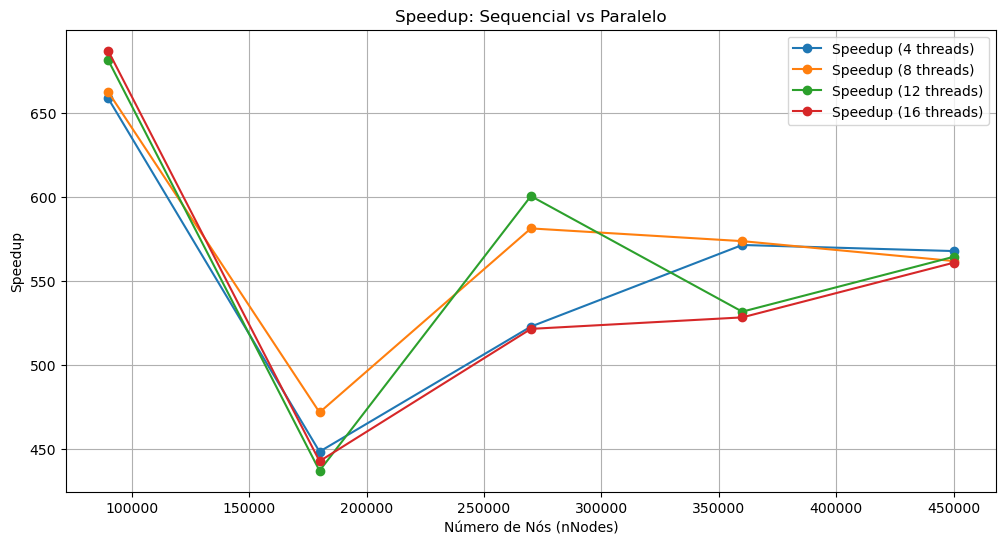

In [21]:

# Calculando speedup
df_speedup = df_parallel.merge(df_sequential, on="nNodes", suffixes=("_paralelo", "_sequencial"))
df_speedup["speedup"] = df_speedup["Tempo_de_execucao_sequencial"] / df_speedup["Tempo_de_execucao_paralelo"]

plt.figure(figsize=(12, 6))
for num_threads in df_speedup["num_threads"].unique():
    df_filtered = df_speedup[df_speedup["num_threads"] == num_threads]
    plt.plot(
        df_filtered["nNodes"],
        df_filtered["speedup"],
        label=f"Speedup ({num_threads} threads)",
        marker='o'
    )

plt.xlabel("Número de Nós (nNodes)")
plt.ylabel("Speedup")
plt.title("Speedup: Sequencial vs Paralelo")
plt.legend()
plt.grid()
plt.show()

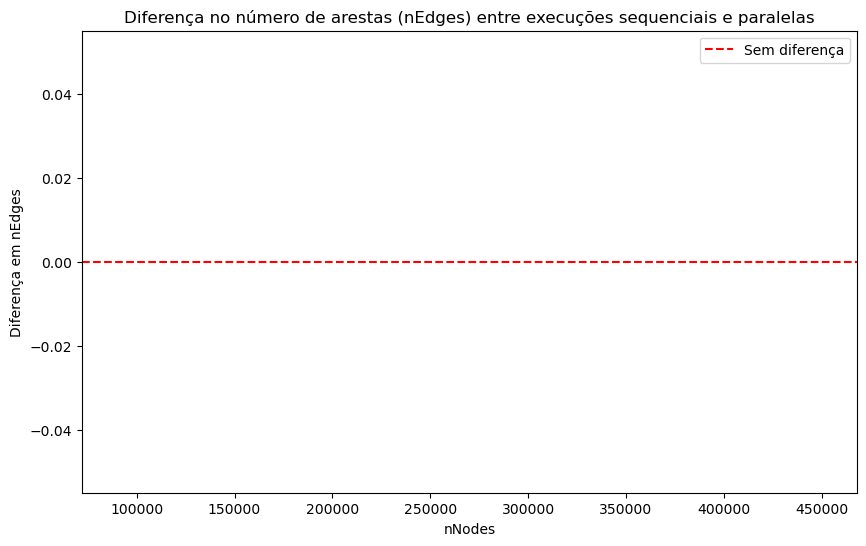